In [3]:
import pandas as pd
import numpy as np
import os

NUM_ROBOTS = 3

dfs = []
for i in range(NUM_ROBOTS):
    df = pd.read_csv(os.path.join('ROS2', "das", f'robot_{i}_data.csv'))
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [4]:
# Parse position columns, not it is in format "[a,b,c]"
df['position'] = df['position'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
df['target'] = df['target'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
# Parse sigma_est and grad_est columns, they are in format "[a,b,c]"
df['sigma_est'] = df['sigma_est'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
df['grad_est'] = df['grad_est'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))

In [12]:
df["grad_est"]

0           [-0.19517083887888598, 0.070350341785824]
1            [-0.29278189101146, 0.10621988440978569]
2         [-0.32959042356516643, 0.12051266891188561]
3         [-0.32997917151143097, 0.12180273213066672]
4       [-0.36053131107917996, -0.007855745690327945]
                            ...                      
2995    [-0.050135438955111786, 0.010434060266250399]
2996     [-0.050128889661140916, 0.01043323325920574]
2997     [-0.05013050761587039, 0.010433376635686142]
2998     [-0.05013389730054243, 0.010433799817244866]
2999     [-0.05013755722723147, 0.010434316401101106]
Name: grad_est, Length: 3000, dtype: object

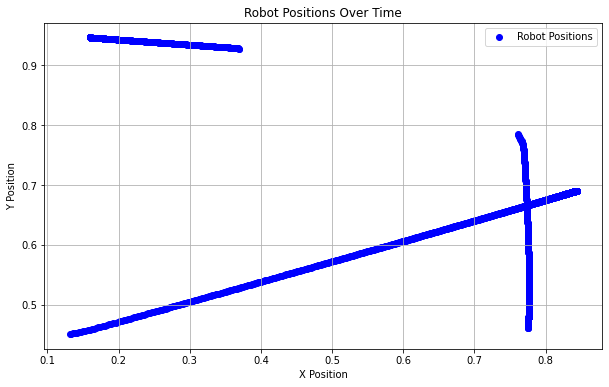

In [ ]:
xx = [p[0] for p in df['grad_est']]
yy = [p[1] for p in df['grad_est']]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, c='blue', label='Robot Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Robot Positions Over Time')
plt.grid()
plt.legend()
plt.show()

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


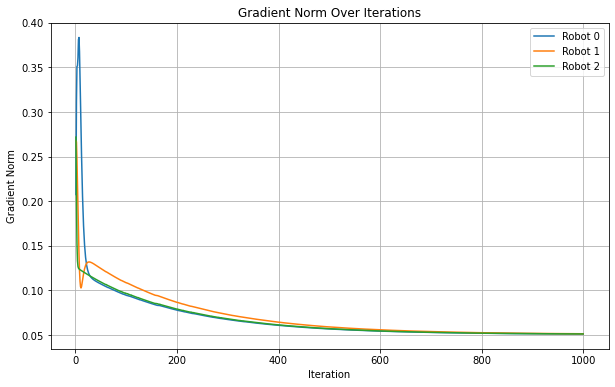

In [18]:

plt.figure(figsize=(10, 6))
for i in range(NUM_ROBOTS):
    robot_df = df[df['robot_id'] == i]
    grad_est_norm = np.array([np.linalg.norm(grad) for grad in robot_df['grad_est']])
    print(grad_est_norm.shape)
    print(robot_df['iteration'].shape)
    plt.plot(robot_df['iteration'].to_numpy(), grad_est_norm, label=f'Robot {i}')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Over Iterations')
plt.grid()
plt.legend()
plt.show()